In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
# Cargar el dataset
ruta = ruta = "C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\vehicule\\car data.csv"

heart_df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

Primeras filas del dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Pric

In [7]:
def eliminar_valores_atipicos(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    # Definir límites inferior y superior
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Filtrar el dataframe para eliminar valores atípicos
    df_filtrado = df[(df[columna] >= limite_inferior) & (df[columna] <= limite_superior)]
    
    return df_filtrado

# Ejemplo: eliminar valores atípicos de la columna 'Present_Price'
heart_df_limpio = eliminar_valores_atipicos(heart_df, 'Present_Price')

# Mostrar el número de filas antes y después de la eliminación de valores atípicos
print("\nNúmero de filas antes de la eliminación de valores atípicos:", heart_df.shape[0])
print("Número de filas después de la eliminación de valores atípicos:", heart_df_limpio.shape[0])


Número de filas antes de la eliminación de valores atípicos: 301
Número de filas después de la eliminación de valores atípicos: 287


In [9]:
print(heart_df_limpio.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

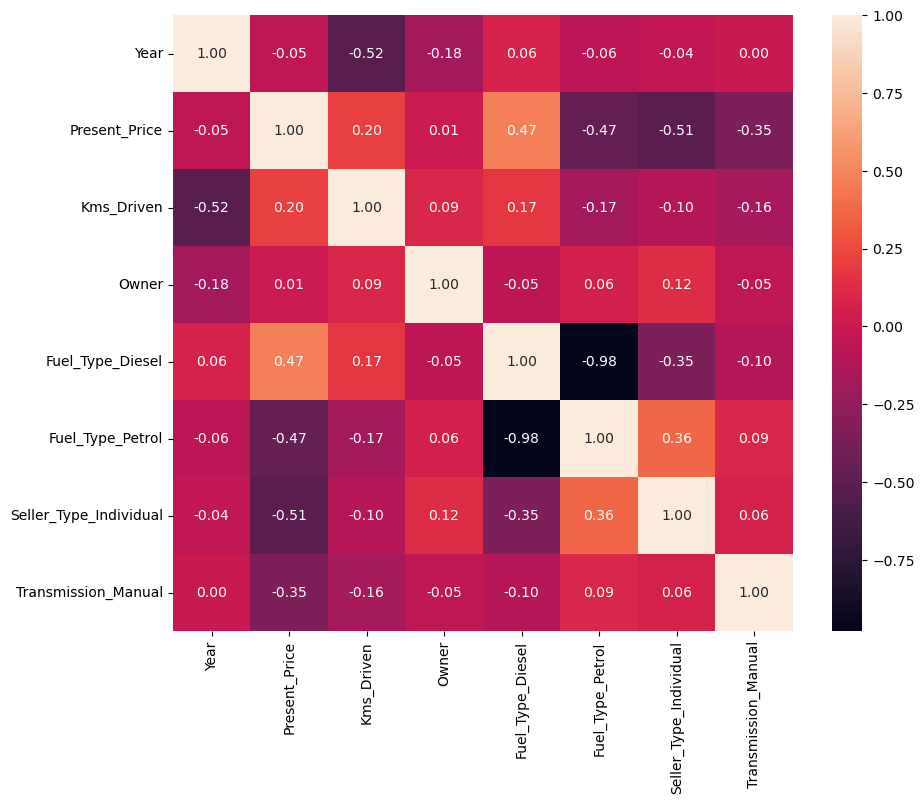

                  Feature  Importance
1           Present_Price    0.881134
0                    Year    0.080738
2              Kms_Driven    0.025356
7     Transmission_Manual    0.005490
6  Seller_Type_Individual    0.002732
5        Fuel_Type_Petrol    0.002142
4        Fuel_Type_Diesel    0.002058
3                   Owner    0.000350
Características seleccionadas: Index(['Year', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')
Dimensiones del conjunto de entrenamiento: (240, 8) (240,)
Dimensiones del conjunto de prueba: (61, 8) (61,)


In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Cargar el dataset
df = pd.read_csv("C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\vehicule\\car data.csv")

# Definir características y variable objetivo
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
y = df['Selling_Price']

# Convertir variables categóricas en variables dummy
X = pd.get_dummies(X, drop_first=True)

# Análisis de correlación
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f")
plt.show()

# Crear el modelo para la importancia de características
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Eliminación recursiva de características (RFE)
linear_model = LinearRegression()
rfe = RFE(linear_model, n_features_to_select=5)
rfe = rfe.fit(X, y)
selected_features = X.columns[rfe.support_]
print("Características seleccionadas:", selected_features)

# Dividir el dataset en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape, y_test.shape)

In [42]:
import pandas as pd

# Convertir `y_train` y `y_test` en categorías discretas (Bajo, Medio, Alto) para clasificación
y_train_discreto = pd.cut(y_train, bins=3, labels=["Bajo", "Medio", "Alto"])
y_test_discreto = pd.cut(y_test, bins=3, labels=["Bajo", "Medio", "Alto"])
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)  # Aumentar max_iter si es necesario
modelo_log_reg.fit(X_train_scaled, y_train_discreto)
# Realizar predicciones
y_pred_log = modelo_log_reg.predict(X_test_scaled)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test_discreto, y_pred_log))
print("Classification Report:\n", classification_report(y_test_discreto, y_pred_log))

Accuracy: 0.8360655737704918
Classification Report:
               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         3
        Bajo       0.86      1.00      0.93        51
       Medio       0.00      0.00      0.00         7

    accuracy                           0.84        61
   macro avg       0.29      0.33      0.31        61
weighted avg       0.72      0.84      0.78        61



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


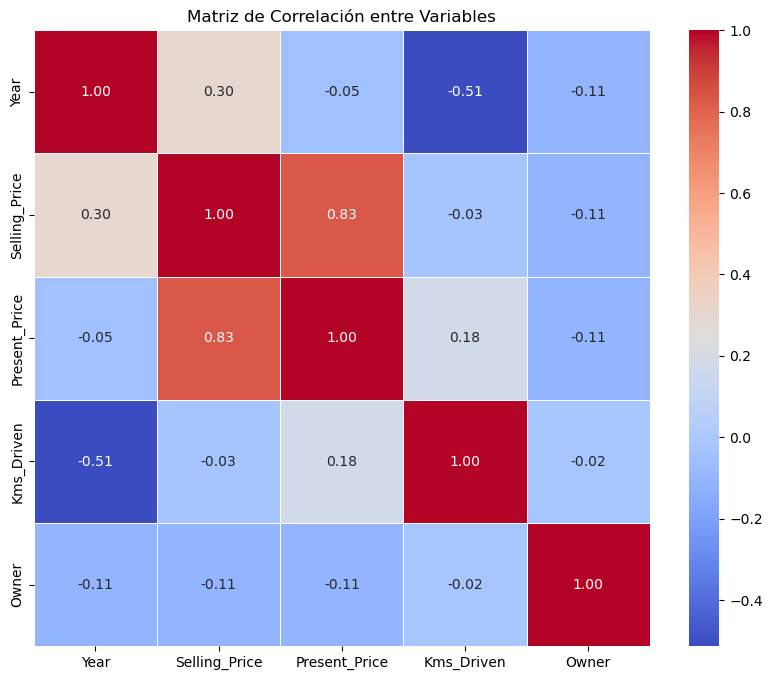

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que ya tienes heart_df_limpio definido

# Filtrar solo las columnas numéricas
numerical_cols = heart_df_limpio.select_dtypes(include=['float64', 'int64']).columns
correlacion = heart_df_limpio[numerical_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap="coolwarm", square=True, fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

In [46]:
from sklearn.model_selection import train_test_split

# Suponiendo que tienes un DataFrame `heart_df_limpio`
# y que ya has definido tus características X y tu variable objetivo y

# Seleccionar características y variable objetivo
X = heart_df_limpio.drop('Selling_Price', axis=1)  # Asegúrate de usar la variable que quieres predecir
y = heart_df_limpio['Selling_Price']  # Variable objetivo

# Dividir el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 229 muestras
Tamaño del conjunto de prueba: 58 muestras


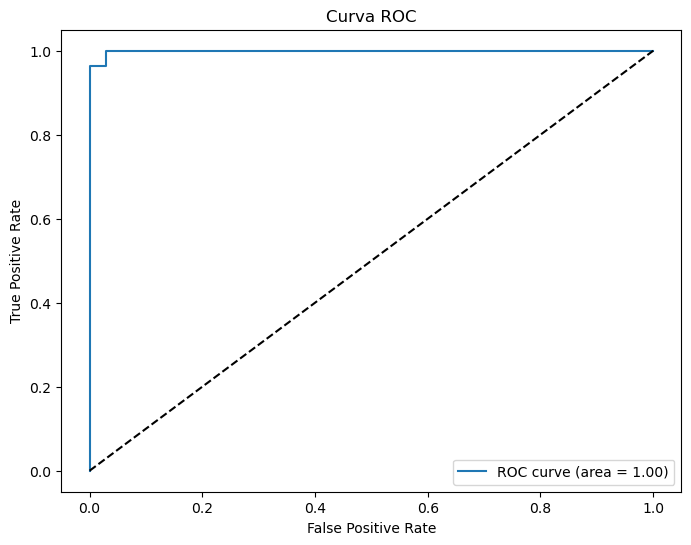


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.93      0.96        27

    accuracy                           0.97        61
   macro avg       0.97      0.96      0.97        61
weighted avg       0.97      0.97      0.97        61



In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Crear una variable binaria para el precio de venta, por ejemplo, usando un umbral
# Esto convierte 'Selling_Price' en 1 si es mayor que el promedio, 0 si no
threshold = y_train.mean()
y_train_binario = (y_train > threshold).astype(int)
y_test_binario = (y_test > threshold).astype(int)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[features_selected])
X_test_scaled = scaler.transform(X_test[features_selected])

# Crear y ajustar el modelo de regresión logística
modelo_log_reg = LogisticRegression(max_iter=300)
modelo_log_reg.fit(X_train_scaled, y_train_binario)

# Predecir probabilidades para el conjunto de prueba
y_prob = modelo_log_reg.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test_binario, y_prob)
roc_auc = roc_auc_score(y_test_binario, y_prob)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

# Evaluación del modelo
print("\nReporte de clasificación:")
print(classification_report(y_test_binario, modelo_log_reg.predict(X_test_scaled)))

In [64]:
from sklearn.model_selection import train_test_split

# Supón que 'X' contiene todas las características y 'y' es la variable objetivo
# Ajusta el tamaño de prueba según tus necesidades (por ejemplo, 0.2 para un 20% de prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
import pandas as pd

# Reemplaza 'ruta/del/archivo.csv' con la ruta de tu archivo
car_data = pd.read_csv("C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\vehicule\\car data.csv")

# Verifica que se haya cargado correctamente
print(car_data.head())

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [70]:
# Imprimir los nombres de las columnas
print("Nombres de las columnas:")
print(car_data.columns.tolist())  # Convertir a lista para una mejor visualización

Nombres de las columnas:
['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']


In [72]:
# Ver los primeros registros y los tipos de datos
print(car_data.head())
print(car_data.dtypes)

  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


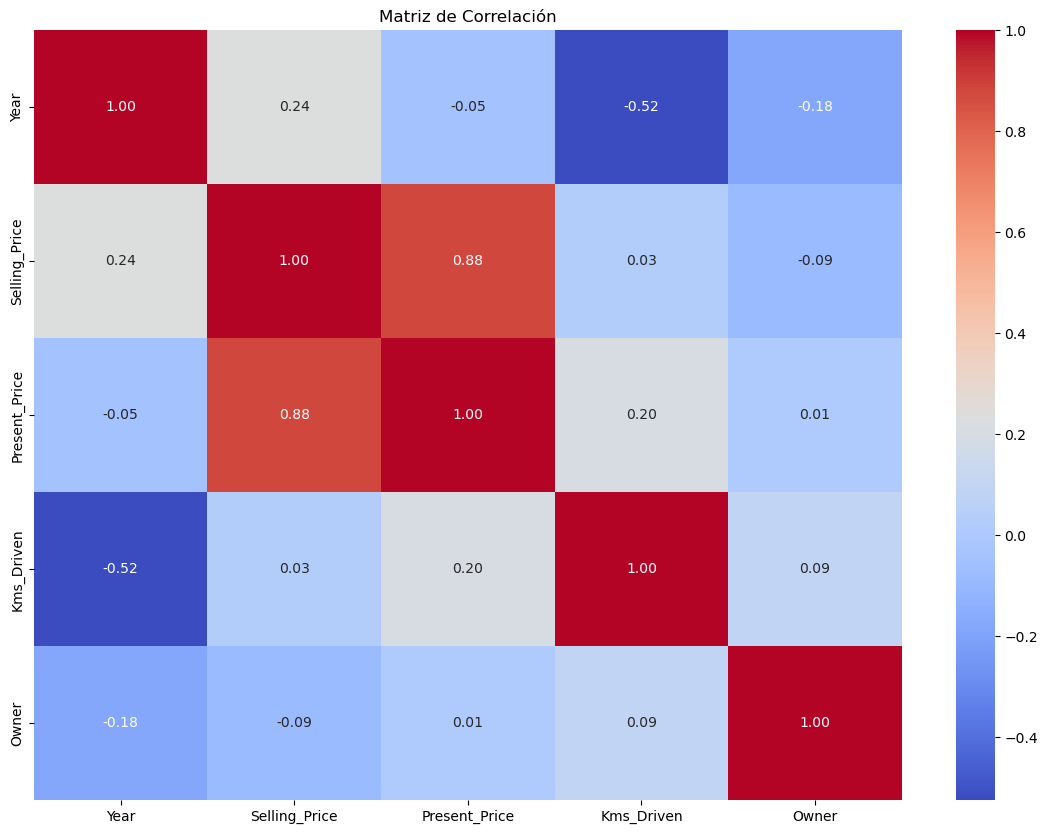

In [74]:
# Seleccionar solo las columnas numéricas
numeric_cols = car_data.select_dtypes(include=['number']).columns
correlation_matrix = car_data[numeric_cols].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [76]:
# Limpiar nombres de columnas para quitar espacios en blanco
car_data.columns = car_data.columns.str.strip()

In [78]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [82]:
# Definir variables independientes (X) y dependientes (y)
X = car_data.drop(columns=['Present_Price'])
y = car_data['Present_Price']



In [84]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
print(car_data.dtypes)

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [88]:
# Definir X y y
X = car_data.drop(columns=['Present_Price'])  # Eliminar la columna de precio de las independientes
y = car_data['Present_Price']  # La variable objetivo es Price

In [90]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Asegúrate de que car_data ya está cargado

# Convertir las columnas categóricas a variables dummies
car_data_dummies = pd.get_dummies(car_data, drop_first=True)

# Definir las variables independientes (X) y dependientes (y)
X = car_data_dummies.drop(columns=['Present_Price'])  # Eliminar la columna de precio
y = car_data_dummies['Present_Price']  # La variable objetivo es Price

# Verificar tipos de columnas en X
print(X.dtypes)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Year                        int64
Selling_Price             float64
Kms_Driven                  int64
Owner                       int64
Car_Name_Activa 3g           bool
                           ...   
Car_Name_xcent               bool
Fuel_Type_Diesel             bool
Fuel_Type_Petrol             bool
Seller_Type_Individual       bool
Transmission_Manual          bool
Length: 105, dtype: object
Mean Squared Error: 3.35
R² Score: 0.93


In [96]:
from sklearn.linear_model import LinearRegression

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [98]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supongamos que car_data ya está cargado y procesado

# Convertir variables categóricas a variables dummy
X = pd.get_dummies(car_data.drop(columns=['Present_Price']), drop_first=True)

# Definir la variable objetivo
y = car_data['Present_Price']  # La variable objetivo es Price

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.35
R-squared: 0.93


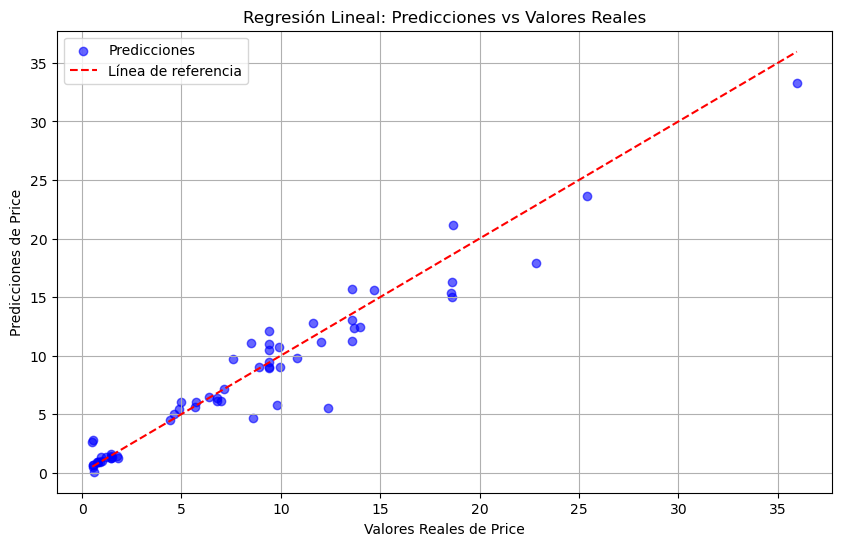

In [100]:
import matplotlib.pyplot as plt

# Graficar los valores reales vs las predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Línea de referencia')
plt.title('Regresión Lineal: Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de Price')
plt.ylabel('Predicciones de Price')
plt.legend()
plt.grid()
plt.show()